In [1]:
# this tutorial was taken from:
# https://www.datacamp.com/community/tutorials/wordcloud-python
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
#% matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the data/ pickle
import pickle

# load it
with open('./data/output_df_wth_all_nr_all_perc_reading.pickle', 'rb') as handle:
    data = pickle.load(handle) 

df = data

# alles auf 2 Nachkommastellen beschränken
df.round(2)


,name,style,text,year,year_dt,nr_token,nr_adj,nr_noun,nr_verb,per_verb,...,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,text_standard
number,,,,,,,,,,,,,,,,,,,,,
0001,Demetrius,D,Demetrius an der russischen Grenze Er ist vo...,1805,1805-01-01,8486.0,600.0,1681.0,1482.0,17.46,...,72.46,8.9,7.1,12.93,11.2,7.14,1450.0,4.88,15.17,6th and 7th grade
0002,Der versöhnte Menschenfeind,D,Der versöhnte Menschenfeind - Fragment Gegend...,1790,1790-01-01,7127.0,584.0,1328.0,1286.0,18.04,...,82.75,8.1,5.2,12.23,9.9,6.92,1193.0,3.64,14.14,3th and 4th grade
0003,Die Braut von Messina,D,Die Braut von Messina oder die feindlichen Brü...,1803,1803-01-01,27129.0,2348.0,5122.0,3624.0,13.36,...,14.15,8.2,15.0,12.46,10.6,6.63,3508.0,7.92,13.65,7th and 8th grade
0004,Die Huldigung der Künste,D,Ihrer Kaiserl. Hoheit der Frau Erbprinze...,1804,1804-01-01,1985.0,157.0,452.0,242.0,12.19,...,22.51,7.4,13.8,11.82,10.1,7.35,333.0,6.43,15.49,6th and 7th grade
0005,Die Jungfrau von Orleans,D,Die Jungfrau von Orleans Eine romantische Trag...,1801,1801-01-01,32189.0,2308.0,6195.0,4801.0,14.92,...,16.08,7.6,14.2,11.59,9.2,6.31,3747.0,53.50,12.31,11th and 12th grade
0006,Die Räuber,D,Die Räuber Ein Schauspiel Quae medicame...,1781,1781-01-01,42202.0,3047.0,7807.0,7432.0,17.61,...,84.07,7.3,4.7,11.01,8.6,6.23,5317.0,2.61,12.03,2th and 3th grade
0007,Die Verschwörung des Fiesco zu Genua,D,Die Verschwörung des Fiesco zu Genua Ein repub...,1783,1783-01-01,30978.0,2404.0,6242.0,5382.0,17.37,...,78.85,7.5,4.6,12.44,8.9,6.35,4438.0,11.20,11.45,11th and 12th grade
0008,Don Carlos,D,"Don Carlos, Infant von Spanien Ein dramatisch...",1788,1788-01-01,45823.0,2795.0,7636.0,6911.0,15.08,...,10.16,6.7,14.4,10.65,7.6,5.97,4794.0,2.03,10.76,10th and 11th grade
0009,Kabale und Liebe,D,Kabale und Liebe Ein bürgerliches Trauerspiel...,1784,1784-01-01,31778.0,2347.0,6126.0,5484.0,17.26,...,85.18,7.5,4.2,10.88,8.1,6.15,4004.0,2.86,11.52,7th and 8th grade


In [3]:
df.head()

,name,style,text,year,year_dt,nr_token,nr_adj,nr_noun,nr_verb,per_verb,...,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,text_standard
number,,,,,,,,,,,,,,,,,,,,,
0001,Demetrius,D,Demetrius an der russischen Grenze Er ist vo...,1805,1805-01-01,8486.0,600.0,1681.0,1482.0,17.464058,...,72.46,8.9,7.1,12.93,11.2,7.14,1450.0,4.875000,15.169998,6th and 7th grade
0002,Der versöhnte Menschenfeind,D,Der versöhnte Menschenfeind - Fragment Gegend...,1790,1790-01-01,7127.0,584.0,1328.0,1286.0,18.044058,...,82.75,8.1,5.2,12.23,9.9,6.92,1193.0,3.636364,14.138439,3th and 4th grade
0003,Die Braut von Messina,D,Die Braut von Messina oder die feindlichen Brü...,1803,1803-01-01,27129.0,2348.0,5122.0,3624.0,13.358399,...,14.15,8.2,15.0,12.46,10.6,6.63,3508.0,7.916667,13.646646,7th and 8th grade
0004,Die Huldigung der Künste,D,Ihrer Kaiserl. Hoheit der Frau Erbprinze...,1804,1804-01-01,1985.0,157.0,452.0,242.0,12.191436,...,22.51,7.4,13.8,11.82,10.1,7.35,333.0,6.428571,15.489678,6th and 7th grade
0005,Die Jungfrau von Orleans,D,Die Jungfrau von Orleans Eine romantische Trag...,1801,1801-01-01,32189.0,2308.0,6195.0,4801.0,14.915033,...,16.08,7.6,14.2,11.59,9.2,6.31,3747.0,53.500000,12.311578,11th and 12th grade


In [4]:
# groupby by style
types = df.groupby('style')

# summary statistic of all types
types.describe()

automated_readability_index                                            \
                            count       mean       std   min     25%    50%   
style                                                                         
B                           478.0  12.369665  2.881732   6.3  10.625  12.00   
D                            15.0   9.700000  1.251285   7.6   8.850   9.50   
E                             8.0  15.787500  5.208904  11.1  12.025  14.55   
G                           130.0  12.826923  4.422507   4.0  10.225  12.25   
H                             4.0  20.900000  3.706751  16.8  19.425  20.50   
N                             8.0  10.125000  1.664546   8.7   9.000   9.40   
P                            20.0  19.975000  2.636560  15.1  18.200  19.85   

                    coleman_liau_index             ...    per_verb             \
          75%   max              count       mean  ...         75%        max   
style                                              ...                          
B      13.500  28.1              478.0  13.359184  ...   17.284953  22.972973   
D      10.550  12.2               15.0  12.108000  ...   17.315421  18.044058   
E      17.475  26.1                8.0  14.621250  ...   18.558950  18.752080   
G      14.375  33.6              130.0  12.557923  ...   14.575229  27.272727   
H      21.975  25.8                4.0  16.907500  ...   15.963110  16.728289   
N      10.625  13.2                8.0  12.565000  ...   14.977098  15.354146   
P      22.000  24.7               20.0  15.986000  ...   15.866689  16.729089   

      smog_index                                                          
           count       mean       std   min     25%    50%     75%   max  
style                                                                     
B          478.0   8.947490  1.324841   5.0   8.200   8.80   9.400  20.1  
D           15.0   7.786667  0.679145   6.7   7.450   7.60   8.150   9.1  
E            8.0  10.387500  2.294987   8.1   8.725   9.95  11.100  15.0  
G          130.0   6.927692  2.873375   0.0   6.400   7.65   8.400  11.9  
H            4.0  12.450000  1.506652  10.9  11.725  12.20  12.925  14.5  
N            8.0   7.462500  0.682302   6.7   7.075   7.30   7.600   8.9  
P           20.0  12.295000  1.006021  10.3  11.800  12.45  12.950  14.1  

[7 rows x 128 columns]

In [5]:
types.mean().sort_values(by='nr_token', ascending=False).round(2)

,nr_token,nr_adj,nr_noun,nr_verb,per_verb,per_noun,per_adj,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog
style,,,,,,,,,,,,,,,,
H,79901.50,7110.25,17452.75,11956.00,15.04,22.05,9.52,55.78,12.45,12.95,16.91,20.90,7.67,6923.25,12.53,20.46
D,25174.80,1761.93,4664.00,3924.33,15.54,19.23,7.18,44.05,7.79,10.38,12.11,9.70,6.64,3045.13,12.93,13.21
E,20901.12,1436.62,3852.88,3785.25,17.02,19.36,8.37,66.41,10.39,9.62,14.62,15.79,7.82,2485.50,15.59,18.83
N,14226.00,978.00,2598.25,2110.12,14.51,19.18,7.14,67.56,7.46,7.12,12.56,10.12,6.70,1882.12,4.98,13.39
P,8542.35,809.55,1770.55,1300.05,15.31,20.74,9.84,56.31,12.29,12.74,15.99,19.97,8.23,1438.65,15.94,21.73
B,1935.78,162.98,319.64,322.31,15.83,17.04,8.64,74.34,8.95,7.19,13.36,12.37,7.91,309.86,7.98,17.58
G,414.99,37.56,95.09,51.16,12.54,21.96,8.58,19.55,6.93,15.40,12.56,12.83,7.81,76.70,8.68,17.96


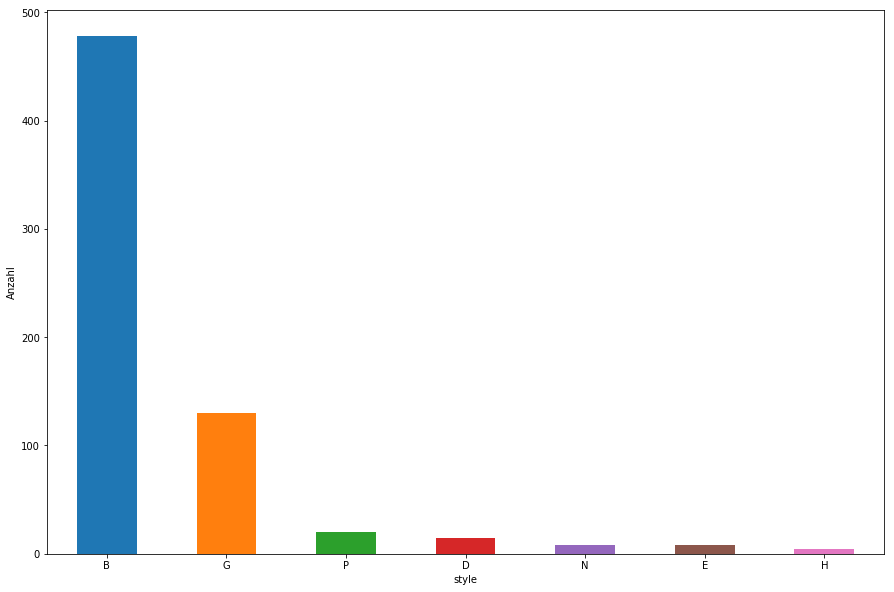

In [6]:
plt.figure(figsize=(15,10))
types.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=0)
plt.xlabel("style")
plt.ylabel("Anzahl")
plt.show()

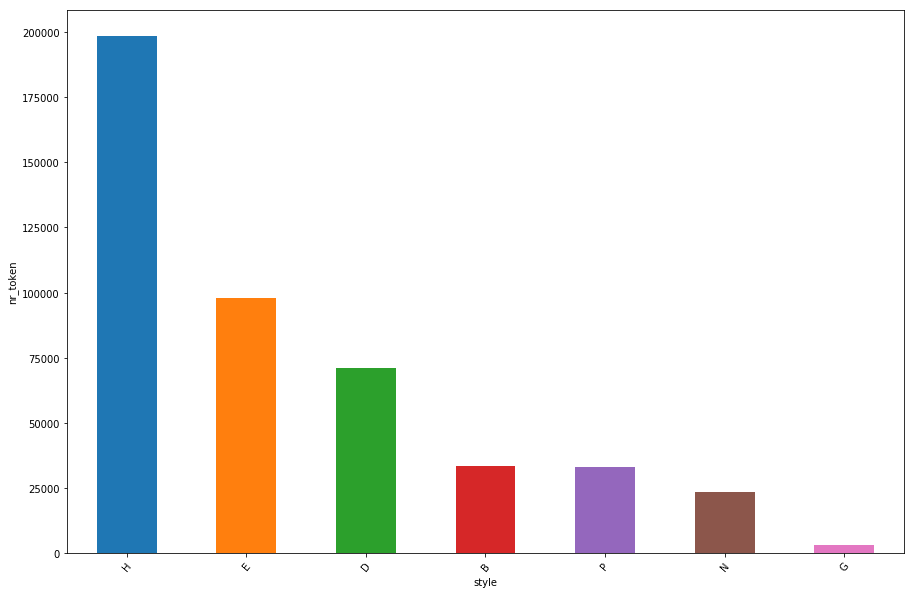

In [7]:
plt.figure(figsize=(15,10))
types.max().sort_values(by="nr_token", ascending=False)["nr_token"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("style")
plt.ylabel("nr_token")
plt.show()

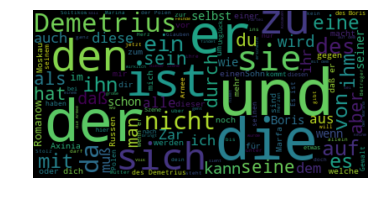

In [8]:
# start with one text
text = df.text[0]

# create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

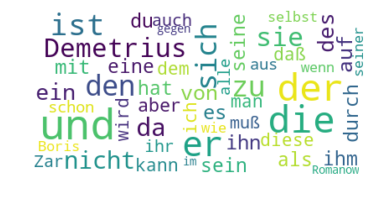

In [9]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color='white').generate(text)

# display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
# Save the image in the img folder:
wordcloud.to_file("./data/img/first_review.png")

In [72]:
# now one wordcloud with all the text
text = ' '.join(text for text in df.text)
print('There are {} words in the combination of all texts.'.format(len(text)))

# how many unique words are in the dataset:
words = text.split(' ')
print('There are {} unique words in the combination of all texts.'.format(len(set(words))))

There are 13379801 words in the combination of all texts.
There are 148291 unique words in the combination of all texts.


In [74]:
# import spacy for the german stopwordlist:
import spacy
nlp = spacy.load('de')
# import the spacy stopwords
from spacy.lang.de.stop_words import STOP_WORDS

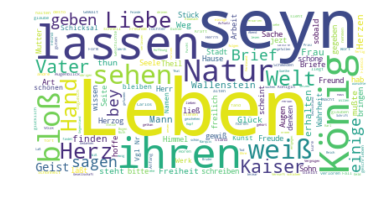

In [77]:
# create a stopword list:
stopwords = set(STOP_WORDS)
stopwords.update(['bla', 'blabla', 'blablabla'])

#print(stopwords)

# generate a world cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)

# save the wordcloud
wordcloud.to_file("./data/img/wordcloud_complete_text.png")

# display the generated image
# the matplotlib way
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [92]:
# now its time for a schiller shaped picture and wordcloud
schiller_mask = np.array(Image.open("./data/img/schiller_unterschrift.png"))

schiller_mask = schiller_mask.reshape((schiller_mask.shape[0],-1), order='F')

def transform_format(val):
    if val.any() == 0:
        return 255
    else:
        return val

# Transform your mask into a new one that will work with the function:
transformed_schiller_mask = np.ndarray((schiller_mask.shape[0],schiller_mask.shape[1]), np.int32)

for i in range(len(schiller_mask)):
    transformed_schiller_mask[i] = list(map(transform_format, schiller_mask[i]))

# Check the expected result of your mask
transformed_schiller_mask

array([[239, 239, 239, ..., 239, 239, 239],
       [239, 239, 239, ..., 239, 239, 239],
       [239, 239, 239, ..., 239, 239, 239],
       ...,
       [239, 239, 239, ..., 239, 239, 239],
       [239, 239, 239, ..., 239, 239, 239],
       [239, 239, 239, ..., 239, 239, 239]], dtype=int32)

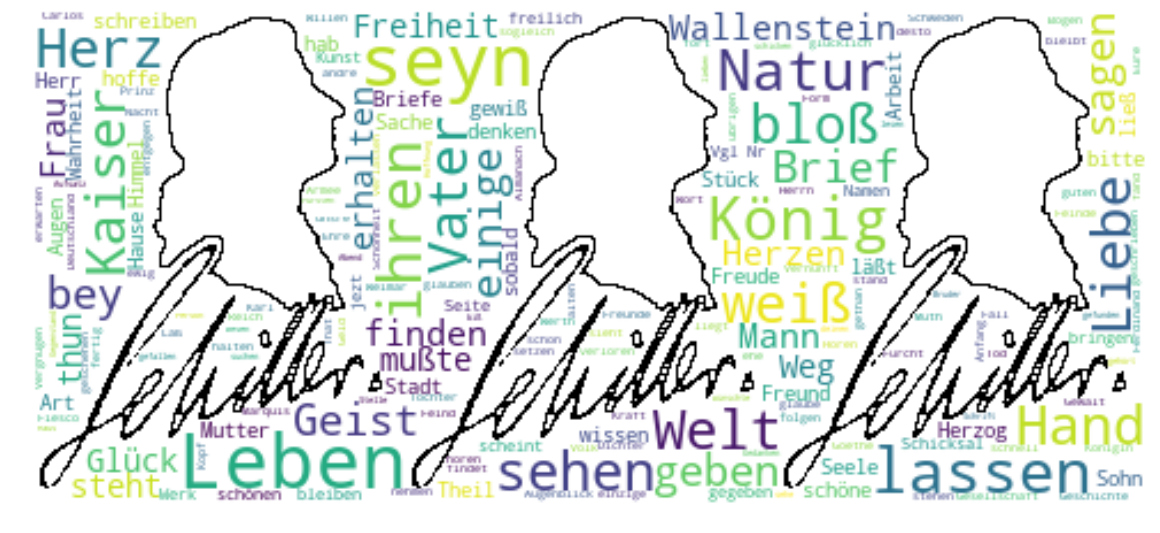

In [93]:
# create a word cloud image
# colors could be found here:
# https://matplotlib.org/2.0.0/examples/color/named_colors.html
wc = WordCloud(background_color='white', max_words=1000, mask=transformed_schiller_mask,
              stopwords=stopwords, contour_width=1, contour_color='black')

# generate the wordcloud
wc.generate(text)

# save it in a file
wc.to_file('./data/img/schiller_wordcloud_sign.png')

# show it here:
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()